# Q1

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mtp
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

In [42]:
Time = pd.read_csv(r"delivery_time.csv")
Time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data visualization

In [43]:
Time.shape

(21, 2)

In [44]:
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [45]:
Time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
ms = MinMaxScaler()
ms.fit_transform(Time)

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ],
       [0.35      , 0.5       ],
       [0.52380952, 0.625     ],
       [0.07142857, 0.125     ],
       [0.47142857, 1.        ],
       [0.51190476, 0.875     ],
       [0.56333333, 0.75      ],
       [0.13095238, 0.25      ],
       [0.41333333, 0.625     ],
       [0.16666667, 0.125     ],
       [0.19190476, 0.125     ],
       [0.32761905, 0.25      ],
       [0.27380952, 0.5       ],
       [0.48142857, 0.625     ],
       [0.        , 0.        ],
       [0.46809524, 0.625     ],
       [0.64285714, 0.375     ]])

<Axes: xlabel='Delivery Time', ylabel='Density'>

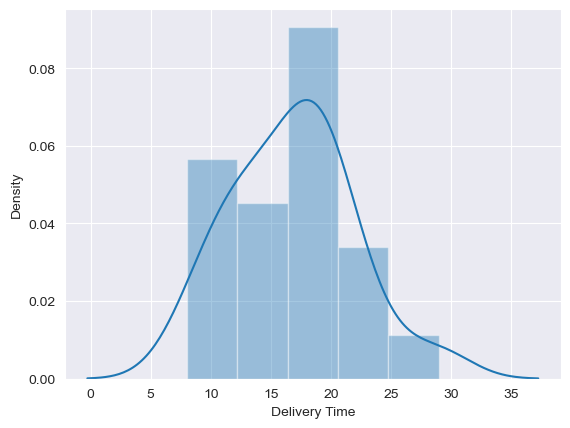

In [48]:
sns.distplot(Time['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x208654a26e0>,
 'caps': [<matplotlib.lines.Line2D at 0x208654a2c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x208654a2440>],
 'medians': [<matplotlib.lines.Line2D at 0x208654a3160>],
 'fliers': [<matplotlib.lines.Line2D at 0x208654a3400>],
 'means': []}

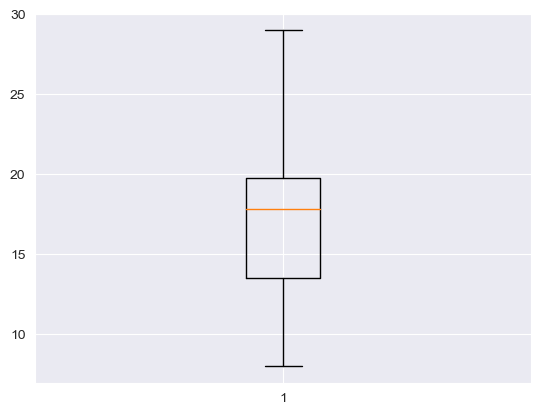

In [49]:
mtp.boxplot(Time['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

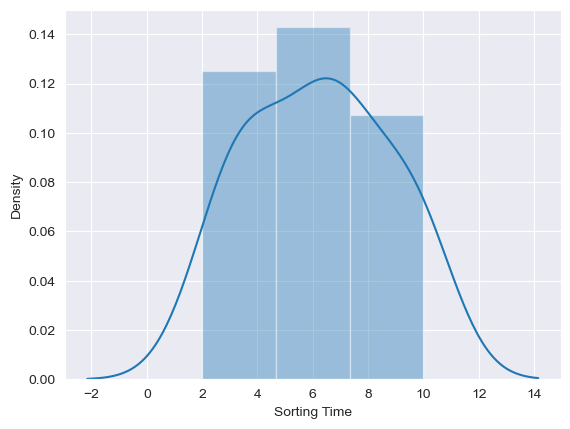

In [50]:
sns.distplot(Time["Sorting Time"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2086582ce50>,
 'caps': [<matplotlib.lines.Line2D at 0x2086582d390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2086582cbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2086582d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2086582db70>],
 'means': []}

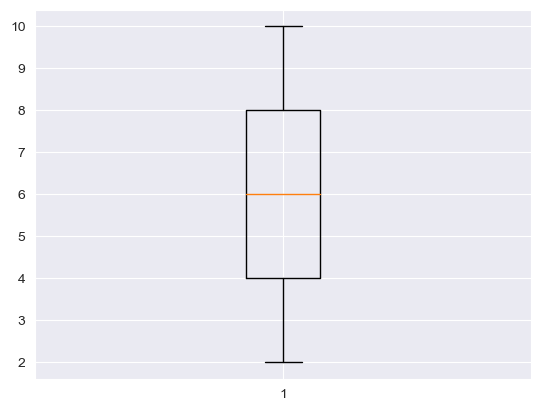

In [51]:
mtp.boxplot(Time['Sorting Time'])

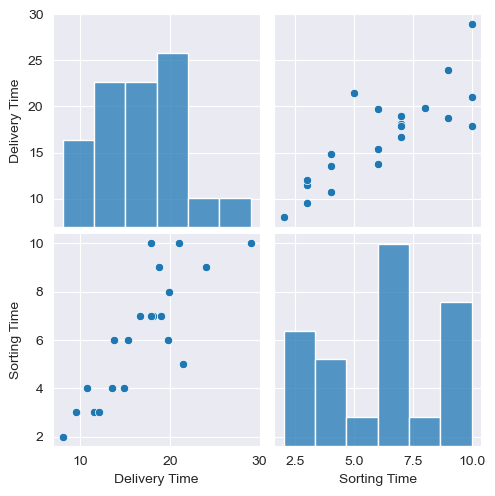

In [52]:
sns.set_style(style='darkgrid')
sns.pairplot(Time)

# Data Engineering

In [53]:
time = Time.rename({'Delivery Time': 'delivery_time','Sorting Time': 'sorting_time'},axis=1)

In [54]:
time

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [55]:
time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='delivery_time', ylabel='sorting_time'>

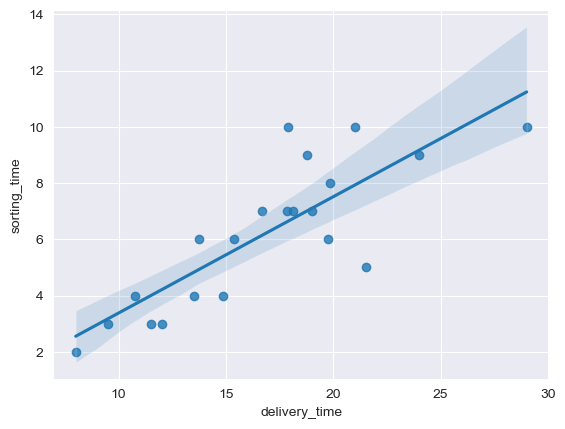

In [56]:
sns.regplot(data=time, x="delivery_time",y="sorting_time")

# Model building

In [57]:
model=smf.ols("delivery_time~sorting_time",data=time).fit() #ordinary least squares, i.e. linear regression.

In [58]:
#Model testing
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [59]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [60]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        17:13:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
pred = model.predict(time)

In [63]:
pred.corr(time['delivery_time'])

0.8259972607955325

In [64]:
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

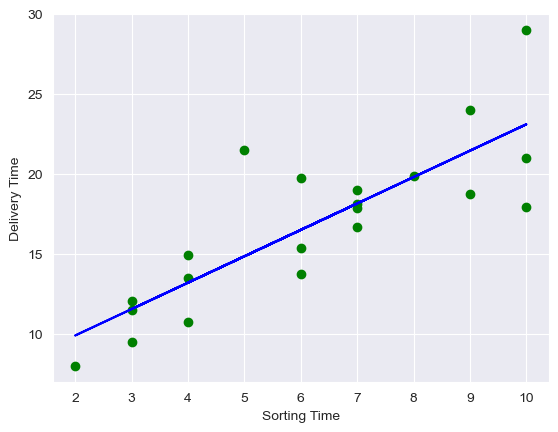

In [65]:
mtp.scatter(x = time['sorting_time'], y = time['delivery_time'], color = 'green')
mtp.plot(time['sorting_time'], pred, color = 'blue')
mtp.xlabel('Sorting Time')
mtp.ylabel('Delivery Time')
mtp.show()   

In [66]:
#Building model using logarithmic transformed data
import numpy as np
model1 = smf.ols('delivery_time~np.log(sorting_time)', data = time).fit()

In [67]:
model1.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        17:13:40   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
pred1 = model1.predict(time)

In [70]:
pred1.corr(time.delivery_time)

0.8339325279256244

In [71]:
pred1.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

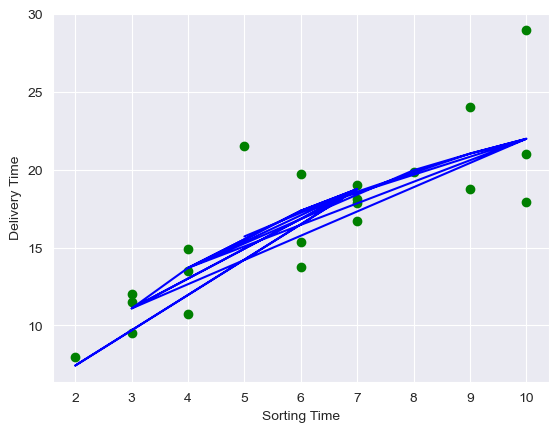

In [72]:
mtp.scatter(x = time['sorting_time'], y = time['delivery_time'], color = 'green')
mtp.plot(time['sorting_time'], pred1, color = 'blue')
mtp.xlabel('Sorting Time')
mtp.ylabel('Delivery Time')
mtp.show() 

In [73]:
#Building the model on exponential transformation
model2 = smf.ols('np.log(delivery_time)~sorting_time', data = time).fit()

In [74]:
model2.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [75]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 11 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                           17:13:41   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
pred2 = model2.predict(time)

In [77]:
pred2.head()

0    3.176888
1    2.543578
2    2.754681
3    3.071336
4    3.176888
dtype: float64

In [78]:
# As we have used log(Delivery_Time) in preparing model so we need to convert it back
pred2 = np.exp(pred2)

In [79]:
pred2.head()

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

In [80]:
pred2.corr(time.delivery_time)

0.8085780108289262

### So we will consider the model having the highest R-squared value which is the expoential transformation that is model2